In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

df = pd.read_csv("data_3dprinter.csv")
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True)

if 'infill_pattern' in df.columns:
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True)


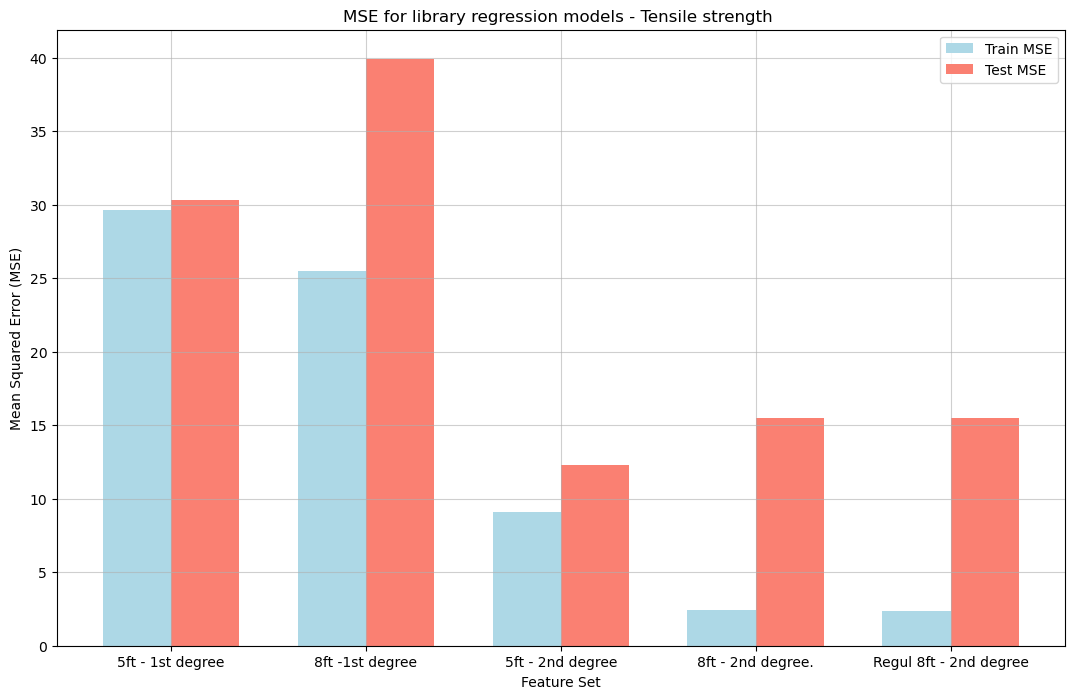

In [11]:
#Correation values for all the models 
r2_data = {
    "Model": [ "5ft - 1st degree", "8ft - 1st degree",  "5ft - 2nd degree ",  "8ft - 2nd degree",  "Regul 8ft - 2nd degree"],
    "Degree": [ 2, 2, 2, 2, 2 ],
    "Train R2": [ 0.61, 0.67, 0.88, 0.97, 0.97],  
    "Test R2":  [ 0.64, 0.53, 0.85, 0.82, 0.82] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(13, 8))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for library regression models - Tensile strength")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()
#constructing the MSE bar chart 
data = {
    "Model": ["5ft - 1st degree", "8ft -1st degree", "5ft - 2nd degree", "8ft - 2nd degree.",  "Regul 8ft - 2nd degree"],
    "Degree": [2, 2, 2, 2, 2],
    "Train MSE": [ 29.66, 25.5, 9.1, 2.4, 2.35],  
    "Test MSE": [ 30.33, 39.9, 12.3, 15.5, 15.5]}    

mse_df = pd.DataFrame(data)

# Plot
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(13, 8))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Train MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Test MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for library regression models - Tensile strength ")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

* 1st Model 5 features Linear Regression - Underfitting -
The model is underfitting is because the R^2 values are weakly to moderately correlated, although they are similair both for training and testing sets. The MSE errors are consistently high for both of the datasets. Therefore the model fails to capture the complexity of the data and provide consistently valid predictions. 

* 2nd Model 8 features Linear Regression - Overfitting -
The model has 8 features and has sogns of overfitting sich as hugely increased MSE values for the test set and also decreased correlation R^2 for testing set. The overfitting is likely due to more included weakly correlated features that bring noise to the model. 

* 3rd Model 5 features 2nd Degree polynomial Regression - Good fit, Best Model - 
The model has strong high correlation R^2 values for both training and testing sets, with a very small difference between them. This difference however is not enough to signify the overfitting of the model. The MSE gap between testing and training set is also small, and in general the MSE error is relatively small. This model shows great and robust predictions of the unseen data. 

* 4th Model 8 features 2nd Degree polynomial Regression - Starts to overfit - 
The significant drop of R^2 in the test set as well as the increased MSE for the test set symbolyses high varience of the model. This model is not does not reliably show the predictions for the unseen data. 

* 5th Model 8 features 2nd Degree polynomial Regression Reguralised with L2 - Overfitting, No difference -
As the model parameters remained the same this implies that the model does not benifit from reguraliesd overfit control. Possibly as more features just bring more noise and 2nd degree 5 features model captured data more effectively. 

The models with 5 features seemed to be the best to capture and predict the unseen data the best, hence those models are decided to be manually implemented with the gradient descent method. 

The model that would best suit this dataset is regression of 2nd degree with 5 features of strongest correlation. 

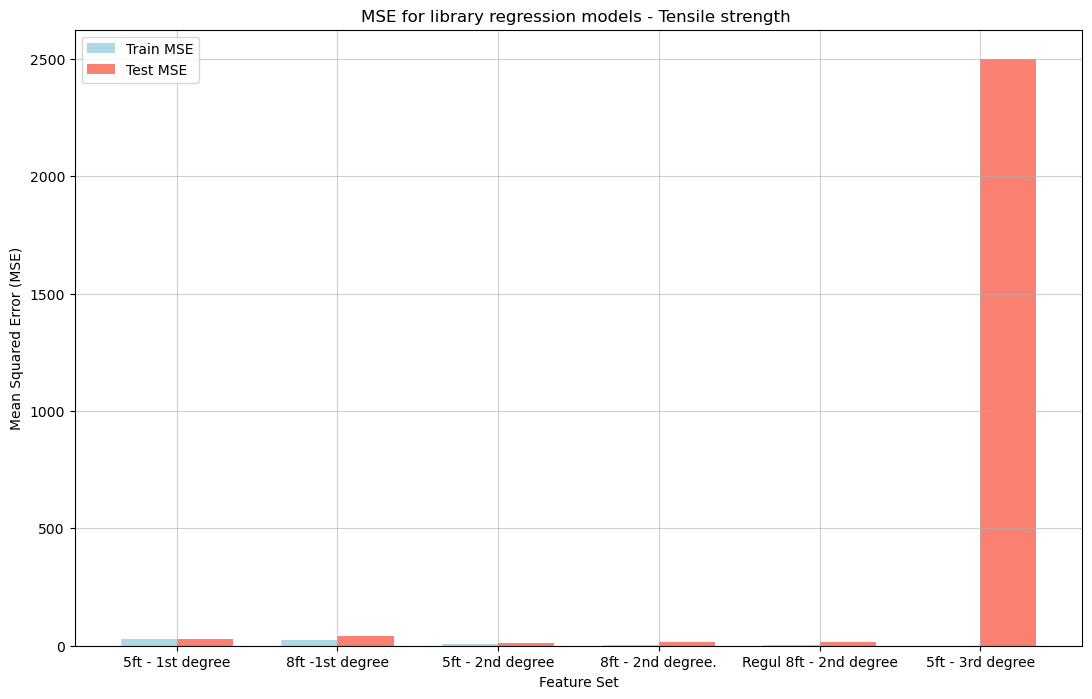

In [9]:
#Correation values for all the models 
r2_data = {
    "Model": [ "5ft - 1st degree", "8ft - 1st degree",  "5ft - 2nd degree ",  "8ft - 2nd degree",  "Regul 8ft - 2nd degree", "5ft - 3rd degree"],
    "Degree": [ 2, 2, 2, 2, 2, 2 ],
    "Train R2": [ 0.61, 0.67, 0.88, 0.97, 0.97, 1],  
    "Test R2":  [ 0.64, 0.53, 0.85, 0.82, 0.82, -29] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(13, 8))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for library regression models - Tensile strength")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()
#constructing the MSE bar chart 
data = {
    "Model": ["5ft - 1st degree", "8ft -1st degree", "5ft - 2nd degree", "8ft - 2nd degree.",  "Regul 8ft - 2nd degree", "5ft - 3rd degree"],
    "Degree": [2, 2, 2, 2, 2, 2],
    "Train MSE": [ 29.66, 25.5, 9.1, 2.4, 2.35, 0],  
    "Test MSE": [ 30.33, 39.9, 12.3, 15.5, 15.5, 2500]}    

mse_df = pd.DataFrame(data)

# Plot
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(13, 8))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Train MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Test MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for library regression models - Tensile strength ")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

* The model of 5 features 3rd degree - Huge overfit-
was also implemente, but it showed a huge overfit, that can be seen on the plotted bar chart. The taining st parametes are perfect with the R^2of 1 and MSE of 0.00, but the traing set parameters show horrible perfomance, with a huge gap beteen the datasets. The model is a clear overfit, and is not implemented manually for this reason.  

* The same 3rd degree model with 5 features was reguralised with ridge, and with the high alpha parameter of 100 (highest best for overfitting). Hoever the model showed very lttle improvement and the high overfit is still present. This concludes that the 3rd degree is too high for this model and lower derees such as 2nd or 1st should be used. 

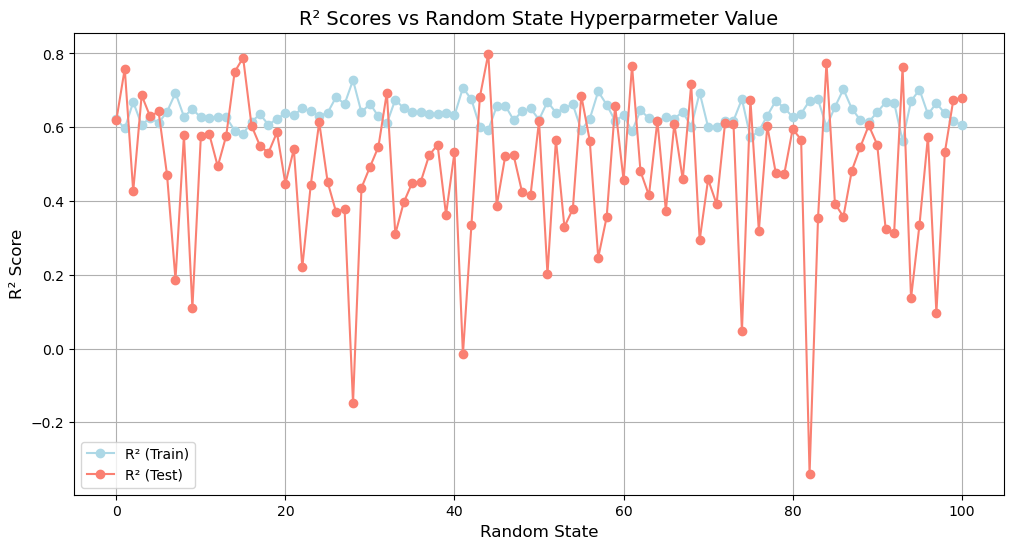

In [7]:
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features]
y = df["tensile_strength"]

results = []#storing results results

for seed in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results.append({
        'Random State': seed,
        'R² (Train)': r2_train,
        'R² (Test)': r2_test})

#Creating a DataFrame
results_df = pd.DataFrame(results)
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['R² (Train)'], label='R² (Train)', color = 'lightblue', marker = 'o')
plt.plot(results_df['Random State'], results_df['R² (Test)'], label='R² (Test)', color = 'salmon', marker = 'o')
plt.title("R² Scores vs Random State Hyperparmeter Value", fontsize=14)
plt.xlabel("Random State", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Random state of 0 was selected for both library and iimplemented regression models of tensie strength, for optimisation of the model perfomance.


Polynomial Regression 1st Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 4.43
Mean Squared Error (MSE): 29.66
Root Mean Squared Error (RMSE) : 5.45
R-squared (R²): 0.61

Testing Set:
Mean Absolute Error (MAE) : 4.49
Mean Squared Error (MSE) : 30.33
Root Mean Squared Error (RMSE): 5.51
R-squared (R²) : 0.64


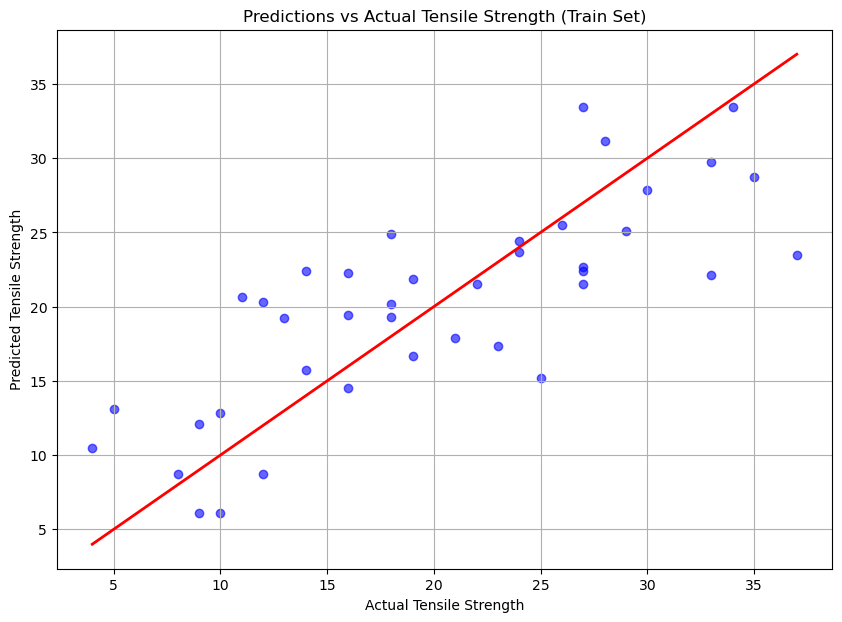

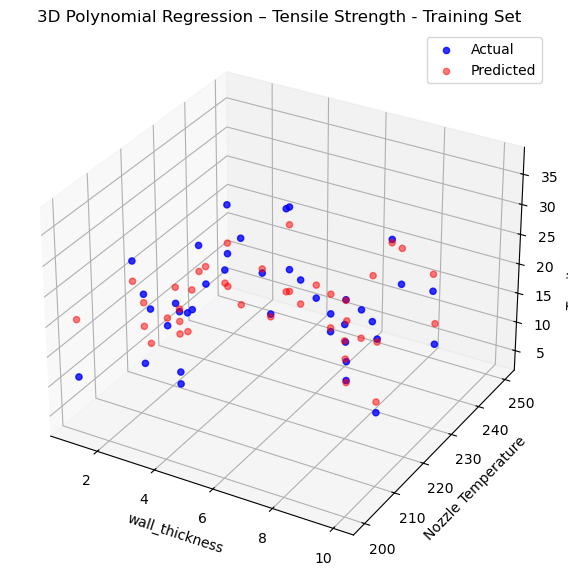

In [10]:
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features]
y = df['tensile_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#creating polynomial features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Making predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#evaluation metrics
print("\nPolynomial Regression 1st Degree - 5 Features- Tensile Strength")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Train
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Train Set)")
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Test Set)")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()


Polynomial Regression 2nd Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 2.29
Mean Squared Error (MSE): 9.12
Root Mean Squared Error (RMSE) : 3.02
R-squared (R²): 0.88

Testing Set:
Mean Absolute Error (MAE) : 2.84
Mean Squared Error (MSE) : 12.93
Root Mean Squared Error (RMSE): 3.60
R-squared (R²) : 0.85


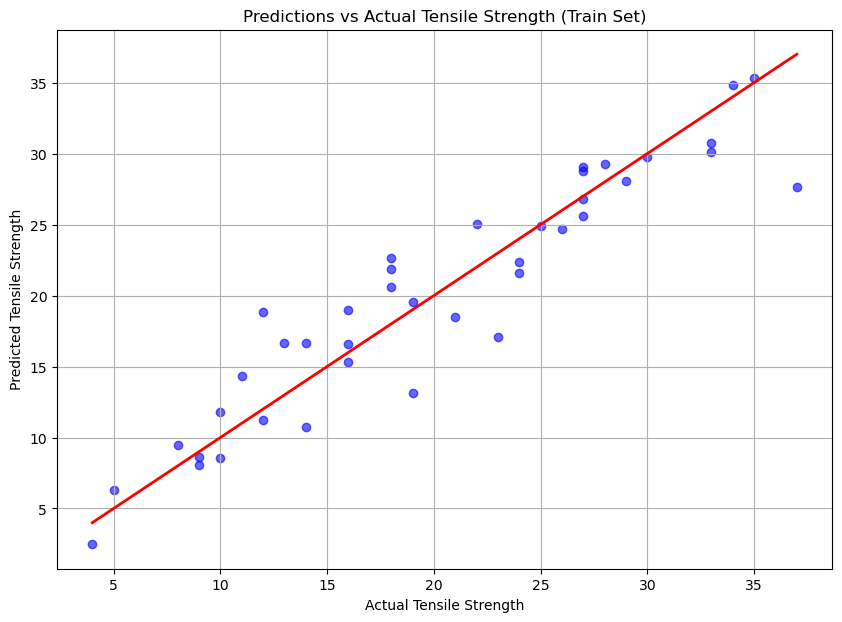

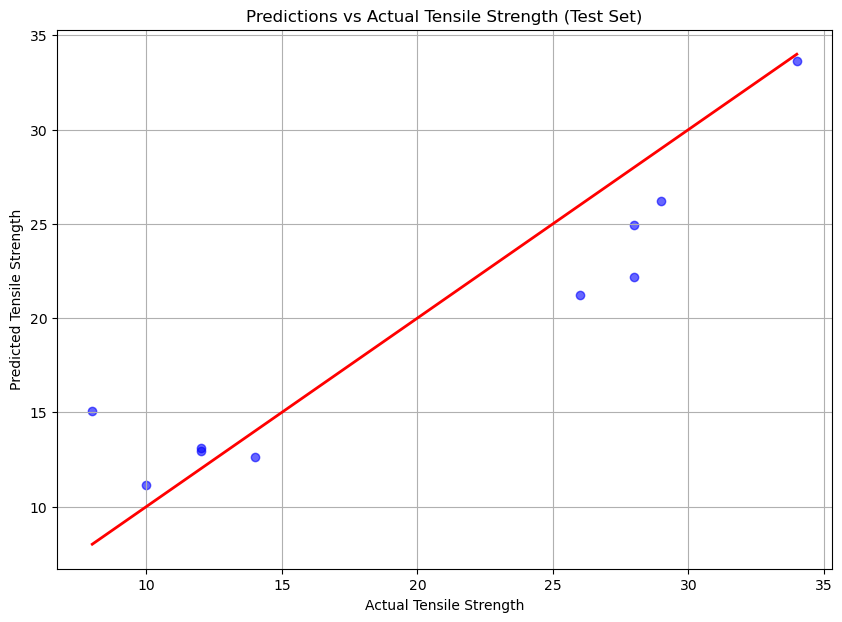

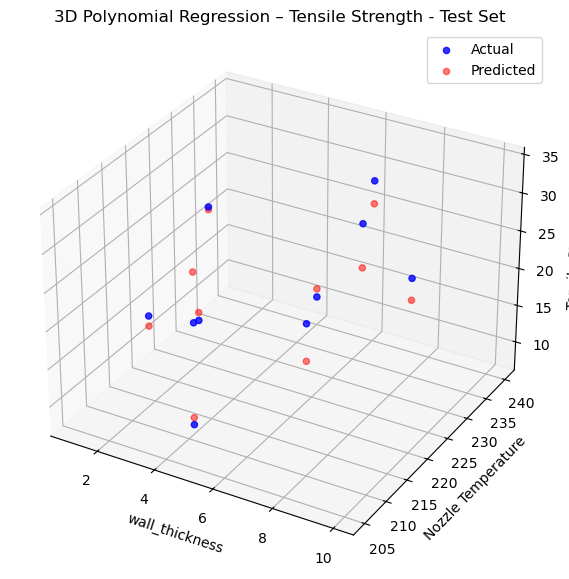

In [12]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features]
y = df['tensile_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Making predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#evaluation metrics
print("\nPolynomial Regression 2nd Degree - 5 Features- Tensile Strength")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Train
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Train Set)")
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Test Set)")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()

regurisation seems not to have an effect on the model correlation or MSE values 

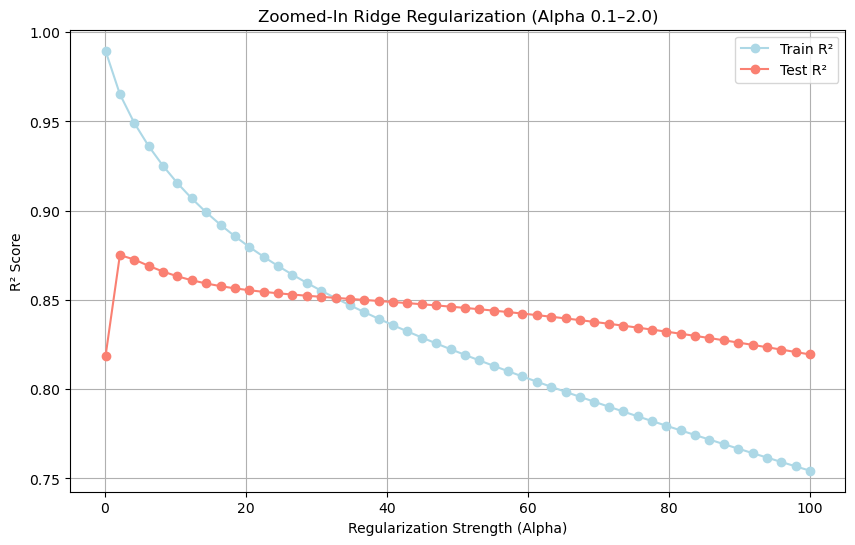

In [7]:
# Selecting features and target
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded', 'print_speed', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['roughness']

#regularising the 2nd degree 6ft model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#scailing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

alphas = np.logspace(-3, 3, 20)
r2_train_list = []
r2_test_list = []

#training the model with the different alpha paramenters 
for alpha in alphas: #helps to visualise the best hyperparameter
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    r2_train_list.append(r2_score(y_train, model.predict(X_train)))
    r2_test_list.append(r2_score(y_test, model.predict(X_test)))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_train_list, label='Train R²', marker='o', color='lightblue')
plt.plot(alphas, r2_test_list, label='Test R²', marker='o', color='salmon')
plt.xscale('log')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Effect of Ridge Regularization on Model Performance")
plt.grid(True)
plt.legend()
plt.show()

#defining the zoomed in values of alpha 
zoomed_alphas = np.linspace(0.1, 100.0, 50)#setting the range and the number of values
zoomed_r2_train = []
zoomed_r2_test = []

#training  and evaluate Ridge regression for each alpha
for alpha in zoomed_alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    zoomed_r2_train.append(r2_score(y_train, y_train_pred))
    zoomed_r2_test.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(zoomed_alphas, zoomed_r2_train, label='Train R²', marker='o', color='lightblue')
plt.plot(zoomed_alphas, zoomed_r2_test, label='Test R²', marker='o',  color='salmon')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Zoomed-In Ridge Regularization (Alpha 0.1–2.0)")
plt.grid(True)
plt.legend()
plt.show()


Polynomial Regression 2nd Degree - 8 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 2.36
Root Mean Squared Error (RMSE) : 1.54
R-squared (R²): 0.97

Testing Set:
Mean Absolute Error (MAE) : 3.33
Mean Squared Error (MSE) : 15.52
Root Mean Squared Error (RMSE): 3.94
R-squared (R²) : 0.82


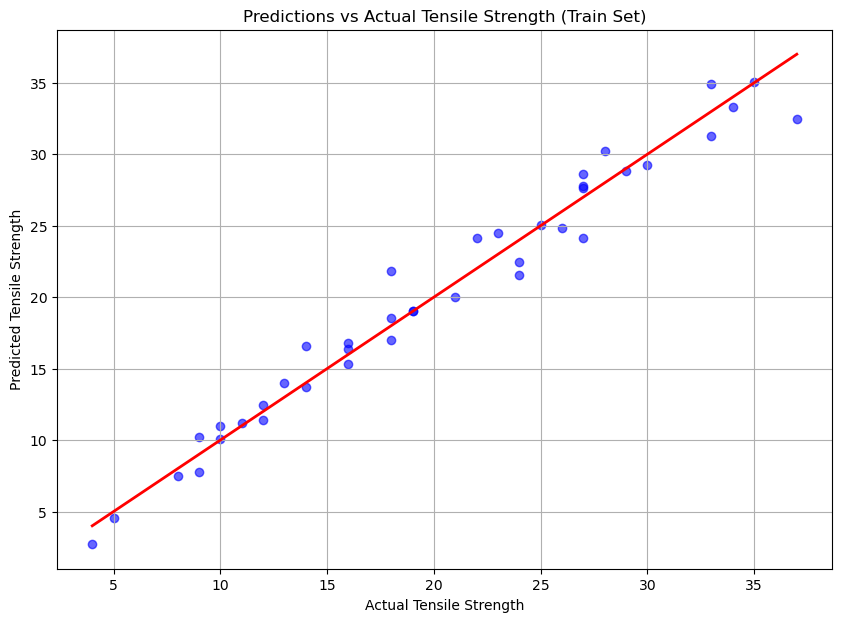

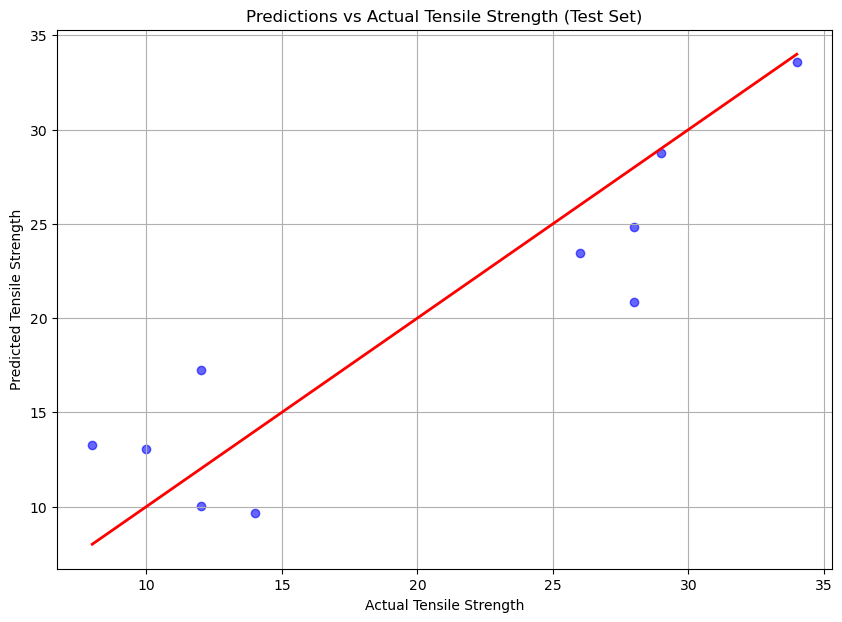

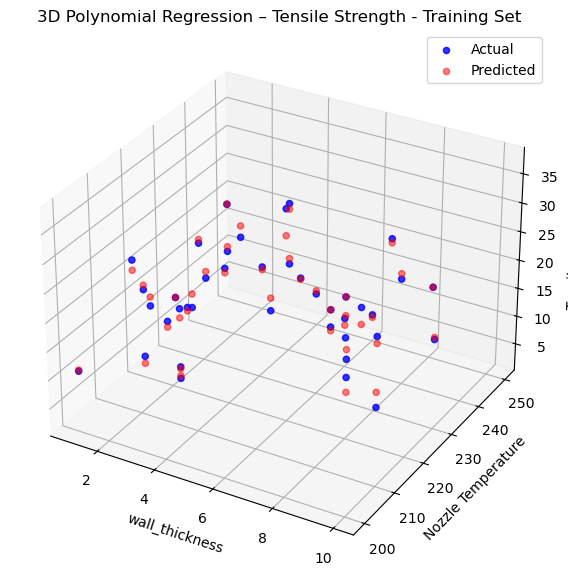

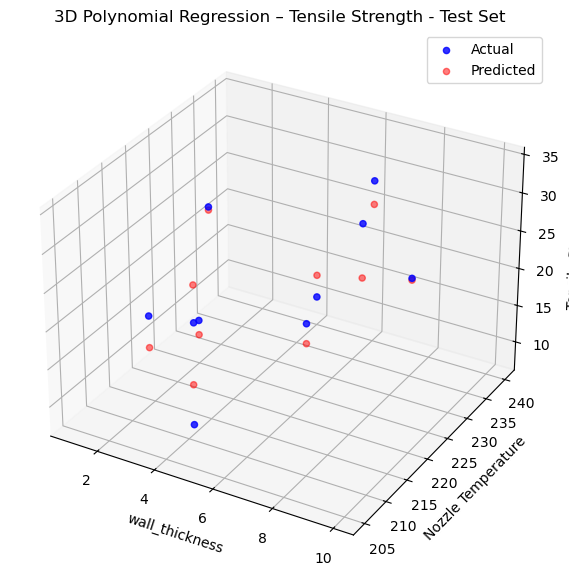

In [25]:
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded', 'print_speed', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['tensile_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=10)  
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#evaluation metrics
print("\nPolynomial Regression 2nd Degree - 8 Features- Tensile Strength")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Train
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Train Set)")
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Test Set)")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()

The regurisation for this model seeemed independent of the alpha value. 


Polynomial Regression 3rd Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE) : 0.00
R-squared (R²): 1.00

Testing Set:
Mean Absolute Error (MAE) : 43.49
Mean Squared Error (MSE) : 2560.58
Root Mean Squared Error (RMSE): 50.60
R-squared (R²) : -29.16


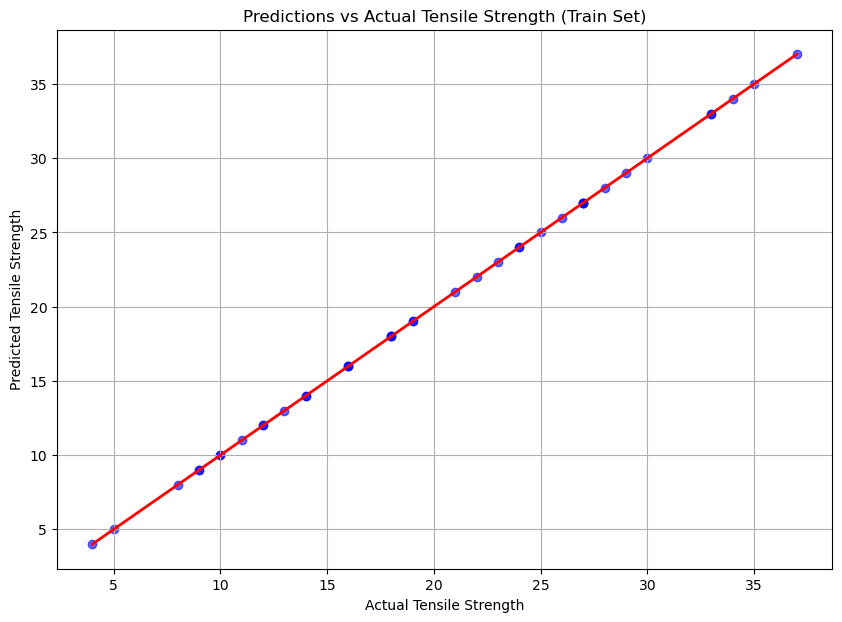

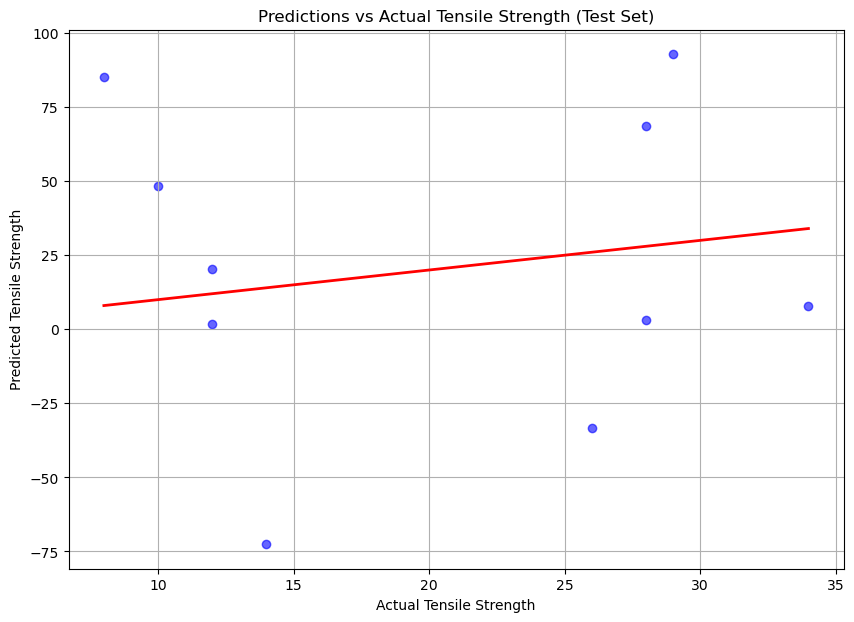

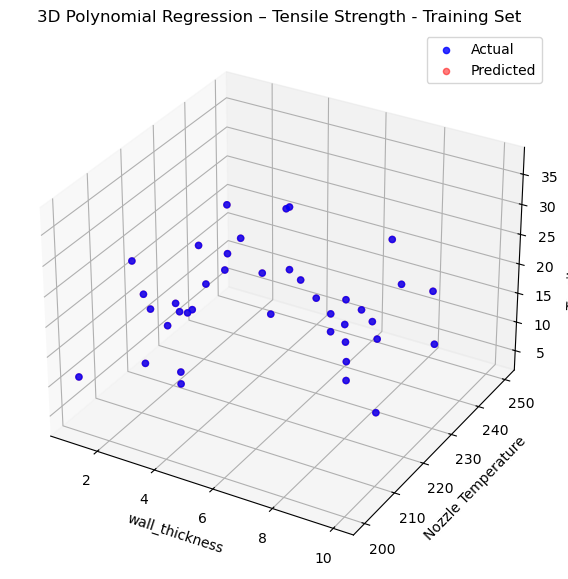

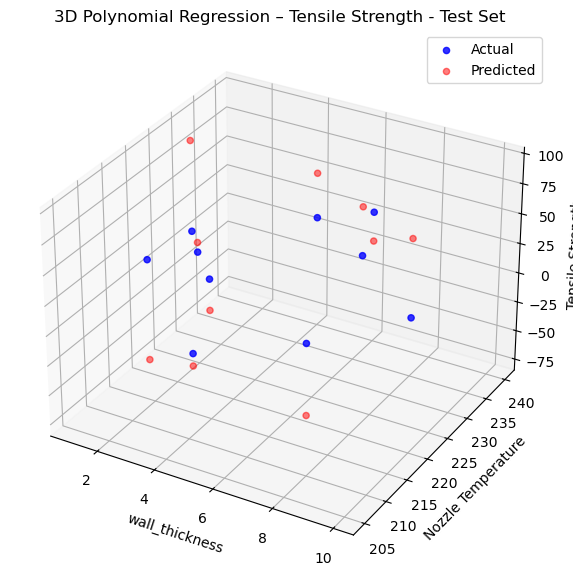

In [5]:
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features]
y = df['tensile_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#creating polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Making predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#evaluation metrics
print("\nPolynomial Regression 3rd Degree - 5 Features- Tensile Strength")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Train
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Train Set)")
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Test Set)")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()


Polynomial Regression 3rd Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE) : 0.00
R-squared (R²): 1.00

Testing Set:
Mean Absolute Error (MAE) : 43.49
Mean Squared Error (MSE) : 2560.58
Root Mean Squared Error (RMSE): 50.60
R-squared (R²) : -29.16


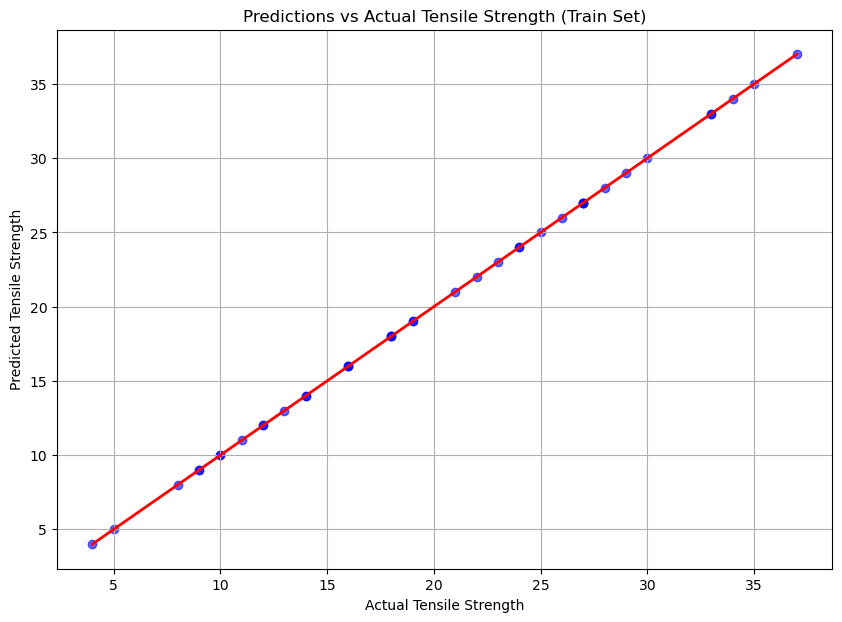

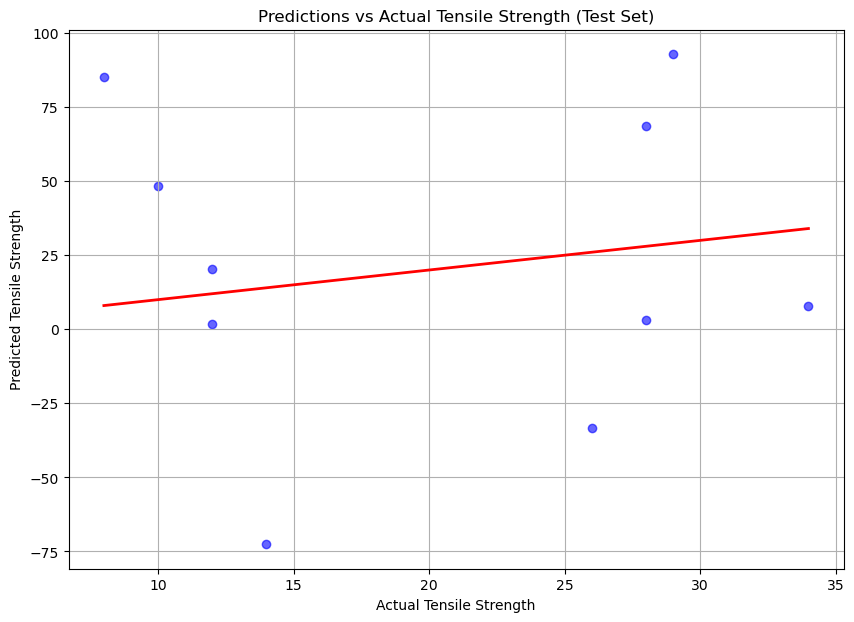

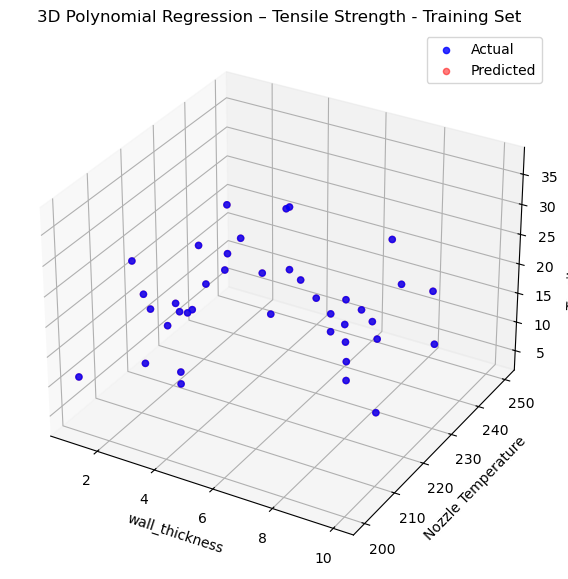

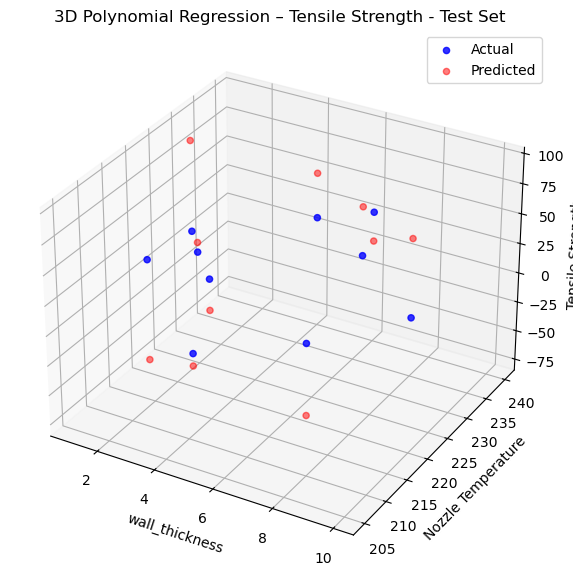

In [23]:

features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features]
y = df['tensile_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#creating polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)


#Making predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

ridge_model = Ridge(alpha=100)  
ridge_model.fit(X_train, y_train)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#evaluation metrics
print("\nPolynomial Regression 3rd Degree - 5 Features- Tensile Strength")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Train
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Train Set)")
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Predictions vs Actual Tensile Strength (Test Set)")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train['wall_thickness'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test, color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test['wall_thickness'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("wall_thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()